In [1]:
import os
import json
import math
import numpy as np
import pandas as pd

## Imports for plotting
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('svg', 'pdf') # For export
from matplotlib.colors import to_rgb
import matplotlib
matplotlib.rcParams['lines.linewidth'] = 2.0
import seaborn as sns
sns.reset_orig()
sns.set()


## PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data as data
import torch.optim as optim
# Torchvision
import torchvision
from torchvision.utils import save_image
from torchvision.datasets import FashionMNIST
from torchvision.transforms import v2
from torchvision.datasets import ImageFolder
from torch.nn.functional import one_hot

from pytorch_fid import fid_score

/tmp/ipykernel_27261/2475230352.py:11: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg', 'pdf') # For export


In [13]:
data = torch.load('piatek_Jakomulski_Podrazka.pt')

In [14]:
data

tensor([[[[223, 212, 202,  ..., 186, 165,  27],
          [233, 222, 176,  ..., 209, 199,  25],
          [228, 198, 206,  ..., 197, 199,  26],
          ...,
          [164,  91,  81,  ..., 148, 177,  11],
          [118, 133, 158,  ..., 152, 120,  18],
          [134, 137, 128,  ..., 138,  98,   5]],

         [[219, 206, 176,  ..., 216, 183,  13],
          [218, 195, 214,  ..., 200, 199,  19],
          [216, 145, 159,  ..., 210, 191,  18],
          ...,
          [ 95,  80,  80,  ..., 138, 123,   8],
          [145,  70, 109,  ..., 120, 141,  10],
          [106, 131,  85,  ..., 132, 116,   5]],

         [[194, 161, 196,  ..., 196, 191,  29],
          [215, 197, 198,  ..., 228, 219,  34],
          [190, 192, 207,  ..., 168, 152,  28],
          ...,
          [115,  68,  56,  ..., 108, 102,   9],
          [ 72, 108,  70,  ...,  91, 108,   9],
          [116, 109, 119,  ...,  62,  80,   3]]],


        [[[141,  91, 115,  ..., 101,  72,   5],
          [152, 116, 105,  ...,  96

In [4]:
data_scalled = data * 255
data_scalled = data_scalled.to(torch.uint8)

In [6]:
data_scalled

tensor([[[[223, 212, 202,  ..., 186, 165,  27],
          [233, 222, 176,  ..., 209, 199,  25],
          [228, 198, 206,  ..., 197, 199,  26],
          ...,
          [164,  91,  81,  ..., 148, 177,  11],
          [118, 133, 158,  ..., 152, 120,  18],
          [134, 137, 128,  ..., 138,  98,   5]],

         [[219, 206, 176,  ..., 216, 183,  13],
          [218, 195, 214,  ..., 200, 199,  19],
          [216, 145, 159,  ..., 210, 191,  18],
          ...,
          [ 95,  80,  80,  ..., 138, 123,   8],
          [145,  70, 109,  ..., 120, 141,  10],
          [106, 131,  85,  ..., 132, 116,   5]],

         [[194, 161, 196,  ..., 196, 191,  29],
          [215, 197, 198,  ..., 228, 219,  34],
          [190, 192, 207,  ..., 168, 152,  28],
          ...,
          [115,  68,  56,  ..., 108, 102,   9],
          [ 72, 108,  70,  ...,  91, 108,   9],
          [116, 109, 119,  ...,  62,  80,   3]]],


        [[[141,  91, 115,  ..., 101,  72,   5],
          [152, 116, 105,  ...,  96

In [7]:
torch.save(data_scalled.cpu().detach(),"piatek_Jakomulski_Podrazka_255.pt")

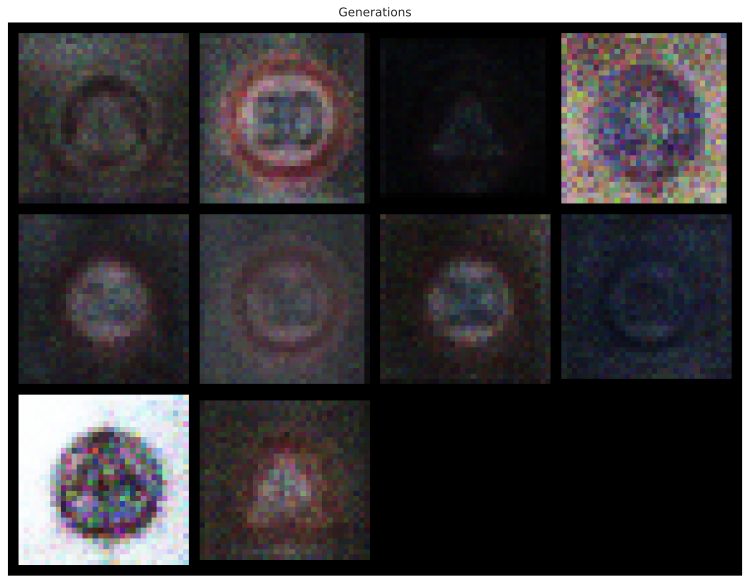

In [12]:
grid = torchvision.utils.make_grid(data_scalled[550:560], nrow=4, normalize=False, value_range=(-1,1))
grid = grid.permute(1, 2, 0)
if len(data) == 4:
    plt.figure(figsize=(10,10))
else:
    plt.figure(figsize=(15,10))
plt.title(f"Generations")
plt.imshow(grid)
plt.axis('off')
plt.show()